In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('diabetes.csv')

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
#Replacing the 0 with Mean values
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

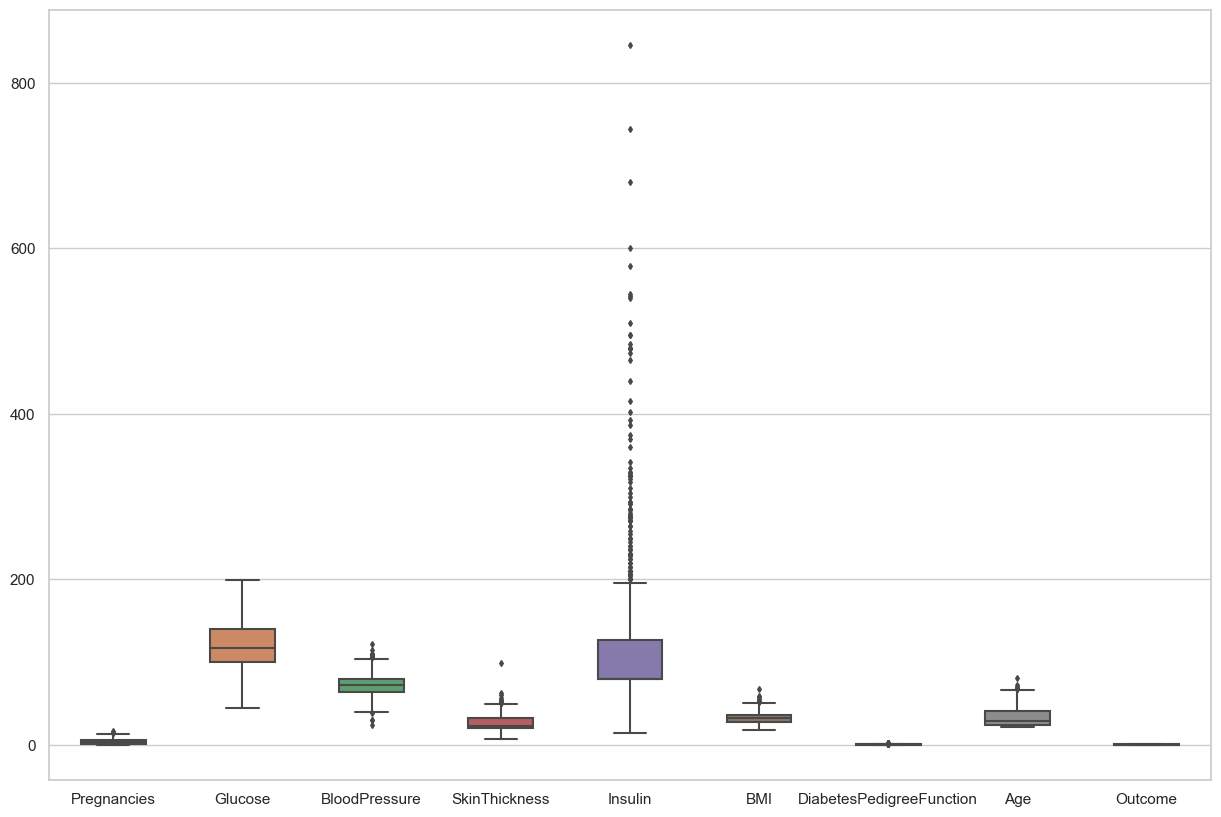

In [17]:
#To Visulize the Outlier
fig ,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data , width = 0.5, ax = ax, fliersize=3)

In [18]:
# Here we segregate the dependent and independent variable
x = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [19]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [22]:
# Separate the datasets into train ans test
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape,x_test.shape

((576, 8), (192, 8))

In [24]:
import pickle

def scaler_standard(x_train, x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    #saving the model
    file = open('C:\\Users\\AKASH VISHWAKARMA\\OneDrive\\Desktop\\Python Program\\Python Projects\\End to End Project Using Logistic Regression\\models\\standardScaler.pkl', 'wb')
    pickle.dump(scaler,file)
    file.close()
    return x_train_scaled , x_test_scaled


In [25]:
x_train_scaled , x_test_scaled = scaler_standard(x_train , x_test)

In [26]:
x_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

#### Decision Tree Model Training with Hyperparameter Tunning

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
parameter ={
    'criterion': ['gini' , 'entropy', 'log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features': ['auto','sqrt','log2']
}

In [31]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()

In [32]:
clf=GridSearchCV(classifier,param_grid=parameter,cv=3,scoring='accuracy',verbose=3)
clf.fit(x_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.646 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.698 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.641 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.641 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.656 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.641 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.667 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.703 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitte

[CV 1/3] END criterion=gini, max_depth=5, max_features=auto, splitter=random;, score=0.708 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=auto, splitter=random;, score=0.714 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=auto, splitter=random;, score=0.630 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best;, score=0.729 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best;, score=0.688 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best;, score=0.724 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.724 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.771 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.693 total time=   0.0s
[CV 1/3] END cri

[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, splitter=best;, score=0.703 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, splitter=best;, score=0.734 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, splitter=best;, score=0.677 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, splitter=random;, score=0.651 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, splitter=random;, score=0.703 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, splitter=random;, score=0.745 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=auto, splitter=best;, score=0.693 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=auto, splitter=best;, score=0.729 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=auto, splitter=best;, score=0.646 total time=   

[CV 2/3] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.641 total time=   0.0s
[CV 3/3] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.745 total time=   0.0s
[CV 1/3] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=0.719 total time=   0.0s
[CV 2/3] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=0.729 total time=   0.0s
[CV 3/3] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=0.729 total time=   0.0s
[CV 1/3] END criterion=log_loss, max_depth=4, max_features=auto, splitter=random;, score=0.661 total time=   0.0s
[CV 2/3] END criterion=log_loss, max_depth=4, max_features=auto, splitter=random;, score=0.755 total time=   0.0s
[CV 3/3] END criterion=log_loss, max_depth=4, max_features=auto, splitter=random;, score=0.672 total time=   0.0s
[CV 1/3] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=0.703 t

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [33]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [34]:
classifier= DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='auto',splitter='random')

In [35]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       splitter='random')

##### Let's see how well our models perform on the test data set

In [36]:
y_pred = classifier.predict(x_test_scaled)

In [37]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[130,   0],
       [ 62,   0]], dtype=int64)

In [38]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [39]:
Accuracy  = (true_positive + true_negative) / (true_positive + false_negative +true_negative)
Accuracy

0.6770833333333334

In [40]:
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [41]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.6770833333333334

In [42]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8074534161490683

In [43]:
import pickle 
# file = open("C:\\Users\\AKASH VISHWAKARMA\\OneDrive\\Desktop\\Python Program\\End to End Project Using Logistic Regression\\models\\modelForPrediction.pkl" , "wb")
file = open('C:\\Users\\AKASH VISHWAKARMA\\OneDrive\\Desktop\\Python Program\\Python Projects\\End to End Project Using Logistic Regression\\models\\modelForPrediction.pkl', 'wb')

pickle.dump(classifier,file)
file.close()